In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data=pd.read_csv("data.csv")

In [49]:
data.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,b'1',b'1',22.830137,b'0',b'1',b'0',b'1',b'1',b'1',b'0',...,b'1',7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,b'1',b'0',23.342466,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,b'1',b'0',26.394521,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,b'0',b'0',39.684932,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'?',4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,b'0',b'1',33.358904,b'0',b'0',b'0',b'1',b'2',b'0',b'1',...,b'1',51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0


In [55]:
def temizle_byte(data):
    if isinstance(data, str) and data.startswith("b'") and data.endswith("'"):
        return data[2:-1]
    return data

# Sadece object tipindeki sütunlara uygula (FutureWarning vermez)
for sutun in data.select_dtypes(include='object').columns:
    data[sutun] = data[sutun].map(temizle_byte)
data.to_csv("temizlenmis_veri.csv", index=False, encoding='utf-8-sig')
data=pd.read_csv("temizlenmis_veri.csv")

In [57]:
data.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1,1,0,...,1,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,1,0,23.342466,0,1,0,-1,-1,1,0,...,1,4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,1,0,26.394521,0,1,0,-1,-1,1,0,...,1,7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,0,0,39.684932,1,1,0,1,2,1,1,...,?,4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,0,1,33.358904,0,0,0,1,2,0,1,...,1,51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0


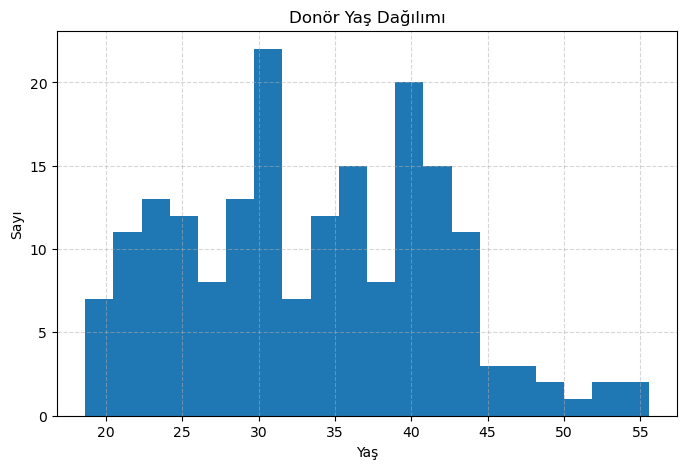

In [43]:
# Donor yaşını sayısala çevir
data['Donorage'] = pd.to_numeric(data['Donorage'], errors='coerce')

# Histogramı çiz
plt.figure(figsize=(8, 5))
plt.hist(data['Donorage'].dropna(), bins=20)
plt.title('Donör Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Sayı')
plt.grid(linestyle='--', alpha=0.5)
plt.show()
